In [1]:
# 1.0 Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.1 Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

sklearn.utils.Bunch

In [5]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

(20640, 8)

In [6]:
# 2.1.1
X.shape
y.shape

(20640, 8)

(20640,)

In [7]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [9]:
# 2.3 Show data field names
print(housing.DESCR)
housing.feature_names

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

In [11]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
#       Input() is used to instantiate a Keras tensor.
#       This tensor will get populated when .fit() is
#       invoked and data starts flowing in.
#       Purpose: Define what tensor shape is to be expected
#                by the model

inputs = tf.keras.Input(shape = X.shape[1], batch_size=None)
type(inputs)

keras.engine.keras_tensor.KerasTensor

In [12]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 8)
input_1


In [13]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [14]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )  # (None, 100)

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [15]:
# 3.2.2 Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [16]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [17]:
# 3.3.1
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)

# 3.3.1 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [18]:
# 3.4 Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          900         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 108)          0           ['dense_1[0][0]',                
                                                                  'input_1[0][0]']            

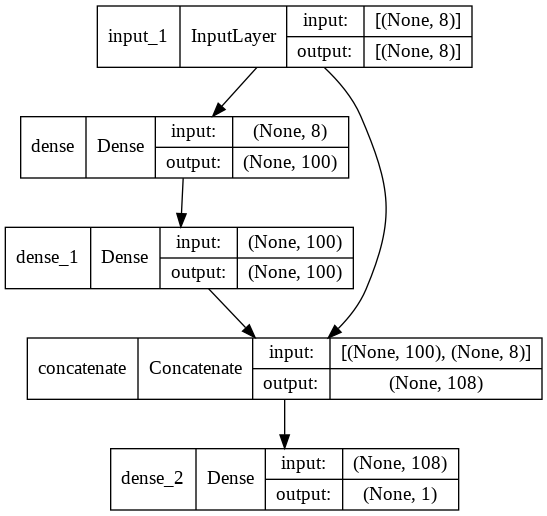

In [19]:
# 3.6 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [20]:
# 3.7 Compile model
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4901
Epoch 2/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4623
Epoch 3/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4617
Epoch 4/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4610
Epoch 5/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4604
Epoch 6/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4600
Epoch 7/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4596
Epoch 8/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4594
Epoch 9/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4592
Epoch 10/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4591
Epoch 11/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4589
Epoch 12/50
516/516 [==============================] - 1s 1ms/step - loss: 2.4588
Epoch 13/50
516/516 [====

In [21]:
# 3.8 
model.evaluate(X_test,y_test)  # 2.56280517578125

129/129 [==============================] - 0s 1ms/step - loss: 2.4906


2.490623712539673

## Wide and Deep Network--Convolution Network

In [22]:
# 4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # Each row is one sample: 7705
input_features = X_train.shape[1]               # No of features: 178
channels = 1
batch_size_tr = no_of_samples_tr                # Data being less, we will
                                                # use all samples in the batch

In [23]:
# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 3795
input_features = X_test.shape[1]               # No of features. 178
channels = 1
batch_size_test = no_of_samples_test           # 3795

In [24]:
# 4.3 Reshape input train/test data as required by Keras for conv1D
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [25]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(shape = (X.shape[1],1))


In [26]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [27]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(filters = 64, kernel_size=3,activation='relu')(inputs)

# 5.3.1
x_rt = layers.Conv1D(filters = 128, kernel_size=3,activation='relu')(x_rt)


In [28]:
# 5.4 Concatenate layers & Flatten:

x = tf.keras.layers.concatenate([x_left,x_rt])
x = layers.Flatten()(x)

In [33]:
# 5.5 Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [30]:
# 5.6 Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [31]:
# 5.7 Create model now
model1 = Model(inputs = [inputs], outputs = [out])

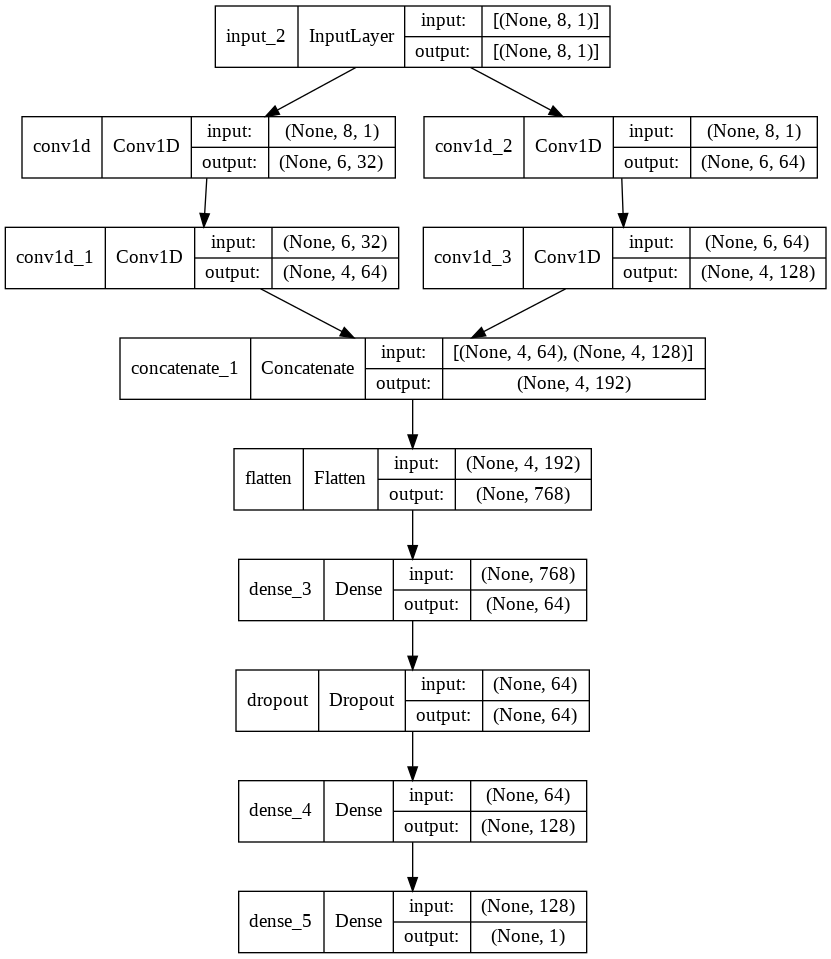

In [32]:
# 5.8 Display model now

plot_model(model1, show_shapes= True)

In [34]:
# 5.8 Compile model

model1.compile(loss = "mean_squared_error", optimizer='adam')  
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
516/516 [==============================] - 3s 4ms/step - loss: 2.4888
Epoch 2/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 3/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 4/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 5/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 6/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 7/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 8/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 9/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 10/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 11/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 12/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4670
Epoch 13/50
516/516 [====

In [35]:
# 5.9 
model1.evaluate(test,y_test)  

129/129 [==============================] - 0s 2ms/step - loss: 2.4987


2.4986603260040283

## Two inputs one output

In [36]:
# 6.0 Two inputs
data1 = X_train[:,:4].copy()
data2 = X_train[:,1:8].copy()

# Define shapes of tensors getting into our models: 
inputsA = tf.keras.Input(
                         shape = data1.shape[1] ,
                         name = "abc"
                         )
inputsB = tf.keras.Input(
                         shape = data2.shape[1],
                         name = "cde"
                         )

# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)

# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)

# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])


# 6.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     We must have a way to match
#     our ORIGINAL InputsA and InputsB
#     with what is fed here:

model2.fit(

	          {
             "abc" : data1,
             "cde" : data2
            },
            y_train,
            epochs = 5
           )


Epoch 1/5
516/516 [==============================] - 2s 2ms/step - loss: 2.4860
Epoch 2/5
516/516 [==============================] - 1s 2ms/step - loss: 2.4624
Epoch 3/5
516/516 [==============================] - 1s 2ms/step - loss: 2.4614
Epoch 4/5
516/516 [==============================] - 1s 2ms/step - loss: 2.4607
Epoch 5/5
516/516 [==============================] - 1s 2ms/step - loss: 2.4603


In [37]:
# 6.7 
model2.evaluate( [X_test[:,:4], X_test[:,1:8]],y_test)  

129/129 [==============================] - 0s 1ms/step - loss: 2.4925


2.4925215244293213

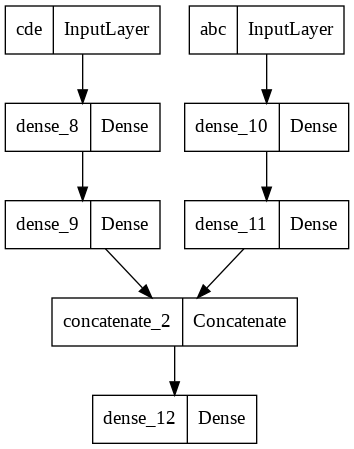

In [38]:
# 6.8 Plot our model
plot_model(model2)

## Two inputs and two outputs model


In [39]:
# 7.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 7.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 7.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 7.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 7.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 7.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_b (InputLayer)              [(None, 7)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 100)          800         ['in_b[0][0]']                   
                                                                                                  
 dense_14 (Dense)               (None, 100)          10100       ['dense_13[0][0]']               
                                                                                                  
 in_a (InputLayer)              [(None, 4)]          0           []                               
                                                                                            

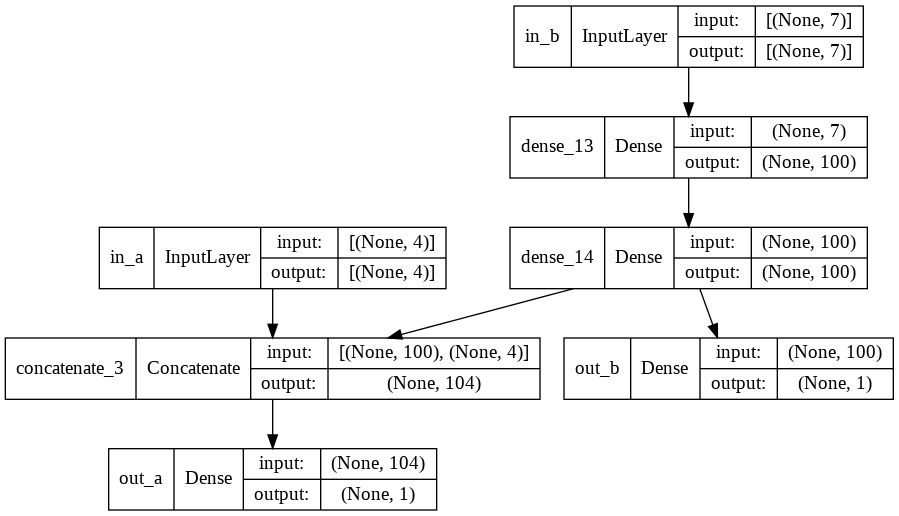

In [40]:
# 7.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [41]:
# 8.0 Compile model now
# Ref: Model.compile: 
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [42]:
# 8.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               [y_train,y_train],
               epochs = 100
           )

Epoch 1/100
516/516 [==============================] - 2s 2ms/step - loss: 2.4959 - out_a_loss: 2.4930 - out_b_loss: 2.5221 - out_a_mse: 2.4930 - out_b_mse: 2.5221
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4629 - out_a_loss: 2.4628 - out_b_loss: 2.4630 - out_a_mse: 2.4628 - out_b_mse: 2.4630
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4620 - out_a_loss: 2.4620 - out_b_loss: 2.4621 - out_a_mse: 2.4620 - out_b_mse: 2.4621
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4614 - out_a_loss: 2.4614 - out_b_loss: 2.4616 - out_a_mse: 2.4614 - out_b_mse: 2.4616
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4610 - out_a_loss: 2.4609 - out_b_loss: 2.4610 - out_a_mse: 2.4609 - out_b_mse: 2.4610
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4604 - out_a_loss: 2.4604 - out_b_loss: 2.4606 - out_a_mse: 2.4604 - out_b_mse: 2.4606
Epoch 7/100
516/

In [43]:
# 8.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

Epoch 1/100
516/516 [==============================] - 2s 3ms/step - loss: 2.4567 - out_a_loss: 2.4567 - out_b_loss: 2.4570 - out_a_mse: 2.4567 - out_b_mse: 2.4570
Epoch 2/100
516/516 [==============================] - 1s 3ms/step - loss: 2.4567 - out_a_loss: 2.4567 - out_b_loss: 2.4569 - out_a_mse: 2.4567 - out_b_mse: 2.4569
Epoch 3/100
516/516 [==============================] - 1s 3ms/step - loss: 2.4567 - out_a_loss: 2.4567 - out_b_loss: 2.4569 - out_a_mse: 2.4567 - out_b_mse: 2.4569
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 2.4567 - out_a_loss: 2.4567 - out_b_loss: 2.4570 - out_a_mse: 2.4567 - out_b_mse: 2.4570
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 2.4567 - out_a_loss: 2.4567 - out_b_loss: 2.4570 - out_a_mse: 2.4567 - out_b_mse: 2.4570
Epoch 6/100
516/516 [==============================] - 1s 3ms/step - loss: 2.4567 - out_a_loss: 2.4566 - out_b_loss: 2.4569 - out_a_mse: 2.4566 - out_b_mse: 2.4569
Epoch 7/100
516/

In [ ]:
# 8.3 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

129/129 [==============================] - 0s 1ms/step - loss: 2.5633 - out_a_loss: 2.5632 - out_b_loss: 2.5639 - out_a_mse: 2.5632 - out_b_mse: 2.5639


[2.5633063316345215,
 2.563241958618164,
 2.563885450363159,
 2.563241958618164,
 2.563885450363159]